# Comparing proposed timelines for reducing Maine's greenhouse gas emissions

There have been at least four different proposals for new targets and deadlines for reductions of GHG emissions in Maine this legislative season. In general these targets take the form of "X percent reduction relative to Y benchmark year by X future year", however it's difficult to make purely mental comparisons between proposals that differ in even two dimensions, and three is even harder. To this end a graphical comparison is desirable.

## Historical comparison
Let's briefly consider where we've been and what comparable goals have been set in the past. 

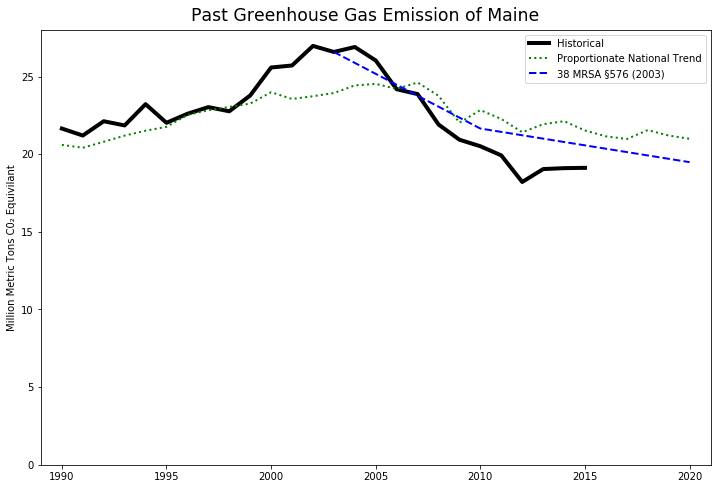

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

historical = {
    'data': {1990: 21.65,
             1991: 21.20,
             1992: 22.12,
             1993: 21.85,
             1994: 23.22,
             1995: 22.02,
             1996: 22.60,
             1997: 23.03,
             1998: 22.76,
             1999: 23.78,
             2000: 25.58,
             2001: 25.71,
             2002: 26.97,
             2003: 26.58,
             2004: 26.90,
             2005: 26.03,
             2006: 24.18,
             2007: 23.87,
             2008: 21.91,
             2009: 20.93,
             2010: 20.51,
             2011: 19.92,
             2012: 18.21,
             2013: 19.04,
             2014: 19.10,
             2015: 19.12},
    'source': 'www.maine.gov/tools/whatsnew/attach.php?id=778255&an=1',
    'line': 'k-',
    'width': 4.0,
    'name': 'Historical'
}
mrsa576 = {
    'data': {2003: historical['data'][2003],
             2010: (1.0 - 0.0) * historical['data'][1990],
             2020: (1.0 - 0.1) * historical['data'][1990]},
    'source': 'http://www.mainelegislature.org/legis/statutes/38/title38sec576.html',
    'line': 'b--',
    'width': 2.0,
    'name': '38 MRSA §576 (2003)'
}
national = {1990: 5038.3,
            1991: 4992.6,
            1992: 5087.0,
            1993: 5183.6,
            1994: 5261.6,
            1995: 5322.6,
            1996: 5509.8,
            1997: 5584.1,
            1998: 5635.5,
            1999: 5687.9,
            2000: 5867.6,
            2001: 5761.0,
            2002: 5804.3,
            2003: 5854.8,
            2004: 5974.5,
            2005: 5998.7,
            2006: 5919.1,
            2007: 6020.6,
            2008: 5810.8,
            2009: 5388.5,
            2010: 5585.7,
            2011: 5446.1,
            2012: 5237.3,
            2013: 5363.0,
            2014: 5411.2,
            2015: 5264.8,
            2016: 5172.4,
            2017: 5131.1,
            2018: 5270.9,
            2019: 5185.0,
            2020: 5134.1}
national_trend = {
    'data': {year: mmtco2e * (
                float(sum(historical['data'].values()))
                    / sum([m for (y, m) in national.items() if y in historical['data']])
             )
             for (year, mmtco2e)
             in national.items()},
    'source': 'https://www.eia.gov/outlooks/steo/data/browser/#/?v=3&f=A&s=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000g0000000000&start=1997&end=2020&map=&maptype=0&ctype=linechart&linechart=TETCCO2',
    'line': 'g:',
    'width': 2.0,
    'name': 'Proportionate National Trend'
}

f1 = plt.figure(1, figsize=(12,8))
f1.suptitle('Past Greenhouse Gas Emission of Maine', size='xx-large', y=0.92)
p1 = f1.add_subplot(111, ylabel='Million Metric Tons C0₂ Equivilant')

for data in [historical, national_trend, mrsa576]:
    p1.plot(data['data'].keys(),
            data['data'].values(),
            data['line'],
            linewidth=data['width'],
            label=data['name'])

p1.axis([1989, 2021, 0, 28])
p1.legend()
plt.show()


The _Historical_ data is taken from the ["Seventh Biennial Report on Progress toward Greenhouse Gas Reduction Goals"](www.maine.gov/tools/whatsnew/attach.php?id=778255&an=1) (2018).

The _Proportionate National Trend_ is based on data from the [Short-Term Energy Outlook Data Browser](https://www.eia.gov/outlooks/steo/data/browser/#/?v=3&f=A&s=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000g0000000000&start=1997&end=2020&map=&maptype=0&ctype=linechart&linechart=TETCCO2); we've scaled it so that, for the years for which the data sets overlap, they have the same average.

To represent the goals in [_38 MRSA §576_](http://www.mainelegislature.org/legis/statutes/38/title38sec576.html) as passed in 2003, we introduce a convention we'll use from here forward: **The line for the set of goals starts at the actual (or estimated) emissions amount in the year in which the bill did or would take effect, and proceeds as linear segments to the target maximum emissions amount in each year for which a goal or deadline is stated; the line ends at the last such deadline.**

## Prognosis under future emission regimes

The IPCC's Special Report on Global Warming of 1.5 ºC, [Summary for Policymakers](https://www.ipcc.ch/sr15/chapter/summary-for-policy-makers/), section C.1, reads as follows:

> In model pathways with no or limited overshoot of 1.5°C, global net anthropogenic CO2 emissions decline by about 45% from 2010 levels by 2030 (40–60% interquartile range), reaching net zero around 2050 (2045–2055 interquartile range). For limiting global warming to below 2°C CO2 emissions are projected to decline by about 25% by 2030 in most pathways (10–30% interquartile range) and reach net zero around 2070 (2065–2080 interquartile range). ...

This is backwards from how we usually think about the problem; it treats our emissions-timeline as a probabilistic unknown dependent on fixed warming timelines. When we turn this back around into the usual causal model we must remember to represent the uncertainty ranges accurately. The IPCC reports aggregate many models of many future scenarios; including different models is desirable because the various models have some uncertainty. _The interquartile ranges capture the middle 50% of scenarios that are expected to meet the stated criteria._ 

A discussion of negative net emissions, how to model them and how to graphically represent ranges of such models, is outside the scope of this document. That said, we must remember that virtually all compliant scenarios considered by the IPCC included negative net emissions after net emissions reach zero. 

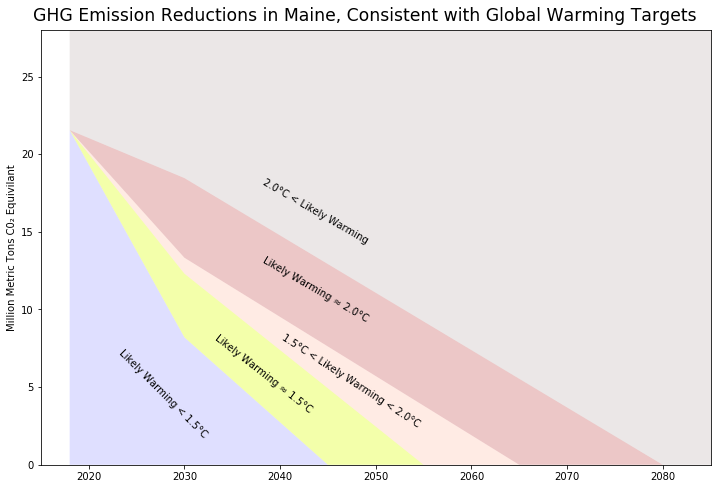

In [2]:
ipcc = {
    '1.5': {
        'low': {
            2018: national_trend['data'][2018],
            2030: historical['data'][2010] * (1.0 - 0.6),
            2045: 0
        },
        'high': {
            2018: national_trend['data'][2018],
            2030: historical['data'][2010] * (1.0 - 0.4),
            2055: 0
        }
    },
    '2.0': {
        'low': {
            2018: national_trend['data'][2018],
            2030: historical['data'][2010] * (1.0 - 0.35),
            2065: 0
        },
        'high': {
            2018: national_trend['data'][2018],
            2030: historical['data'][2010] * (1.0 - 0.10),
            2080: 0
        }
    }
}

regime125 = {
    'points': list(itertools.chain([[2018, 0]],
                              [[year, mmtco2e] for (year, mmtco2e) in ipcc['1.5']['low'].items()])),
    'color': '#0000FF20',
    'name': 'Likely Warming < 1.5°C',
    'x': 2023, 'y': 7, 'r': 45
}
regime150 = {
    'points': list(itertools.chain([[year, mmtco2e] for (year, mmtco2e) in ipcc['1.5']['low'].items()],
                              reversed([[year, mmtco2e] for (year, mmtco2e) in ipcc['1.5']['high'].items()][1:]))),
    'color': '#DDFF0055',
    'name': 'Likely Warming ≈ 1.5°C',
    'x': 2033, 'y': 8, 'r': 38
}
regime175 = {
    'points': list(itertools.chain([[year, mmtco2e] for (year, mmtco2e) in ipcc['1.5']['high'].items()],
                              reversed([[year, mmtco2e] for (year, mmtco2e) in ipcc['2.0']['low'].items()][1:]))),
    'color': '#FF44001B',
    'name': '1.5°C < Likely Warming < 2.0°C',
    'x': 2040, 'y': 8, 'r': 33, 'hide': True
}
regime200 = {
    'points': list(itertools.chain([[year, mmtco2e] for (year, mmtco2e) in ipcc['2.0']['low'].items()],
                              reversed([[year, mmtco2e] for (year, mmtco2e) in ipcc['2.0']['high'].items()][1:]))),
    'color': '#AA000038',
    'name': 'Likely Warming ≈ 2.0°C',
    'x': 2038, 'y': 13, 'r': 30
}
regime225 = {
    'points': list(itertools.chain([[year, mmtco2e] for (year, mmtco2e) in ipcc['2.0']['high'].items()],
                              [[2999, 0], [2999, 100], [2018, 100]])),
    'color': '#33000018',
    'name': '2.0°C < Likely Warming',
    'x': 2038, 'y': 18, 'r': 30
}

f2 = plt.figure(2, figsize=(12,8))
f2.suptitle('GHG Emission Reductions in Maine, Consistent with Global Warming Targets',
            size='xx-large', y=0.92)
p2 = f2.add_subplot(111, ylabel='Million Metric Tons C0₂ Equivilant')

for f in [regime125, regime150, regime175, regime200, regime225]:
    data = list(map(list, zip(*f['points'])))
    p2.fill(data[0],
            data[1],
            f['color'],
            closed = True)
    p2.text(f['x'], f['y'], f['name'], rotation=-f['r'])

p2.axis([2015, 2085, 0, 28])
plt.show()


## Current proposals

Four bills have been submitted to the 129th Maine Legislature. 

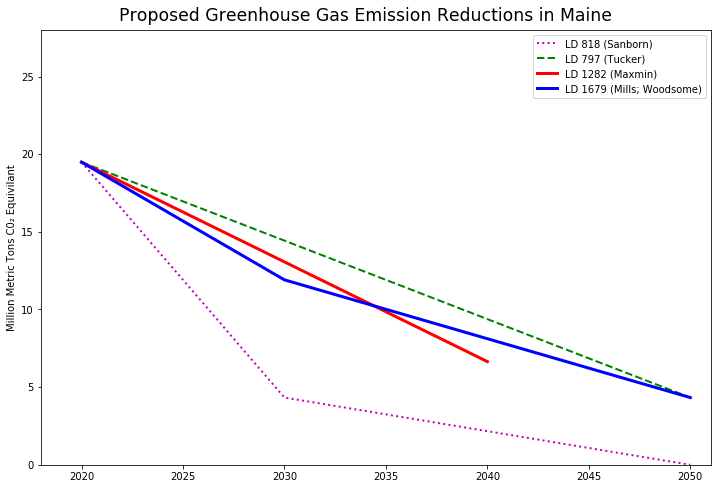

In [3]:
ld818 = {
    'data': {2020: mrsa576['data'][2020],
             2030: (1.0 - 0.8) * historical['data'][1990],
             2050: 0},
    'source': 'http://www.mainelegislature.org/legis/bills/getPDF.asp?paper=SP0254&item=1&snum=129',
    'line': 'm:',
    'width': 2.0,
    'name': 'LD 818 (Sanborn)'
}
ld797 = {
    'data': {2020: mrsa576['data'][2020],
             2050: (1.0 - 0.8) * historical['data'][1990]},
    'source': 'http://www.mainelegislature.org/legis/bills/getPDF.asp?paper=HP0585&item=1&snum=129',
    'line': 'g--',
    'width': 2.0,
    'name': 'LD 797 (Tucker)'
}
ld1282 = {
    'data': {2020: mrsa576['data'][2020],
             2040: (1.0 - 0.75) * historical['data'][2003]},
    'source': 'http://www.mainelegislature.org/legis/bills/getPDF.asp?paper=HP0924&item=1&snum=129',
    'line': 'r-',
    'width': 3.0,
    'name': 'LD 1282 (Maxmin)'
}
ld1679 = {
    'data': {2020: mrsa576['data'][2020],
             2030: (1.0 - 0.45) * historical['data'][1990],
             2050: (1.0 - 0.8) * historical['data'][1990]},
    'source': 'http://www.mainelegislature.org/legis/bills/getPDF.asp?paper=SP0550&item=1&snum=129',
    'line': 'b-',
    'width': 3.0,
    'name': 'LD 1679 (Mills; Woodsome)'
}

f3 = plt.figure(3, figsize=(12,8))
f3.suptitle('Proposed Greenhouse Gas Emission Reductions in Maine', size='xx-large', y=0.92)
p3 = f3.add_subplot(111, ylabel='Million Metric Tons C0₂ Equivilant')

for data in [ld818, ld797, ld1282, ld1679]:
    p3.plot(data['data'].keys(),
            data['data'].values(),
            data['line'],
            linewidth=data['width'],
            label=data['name'])

p3.axis([2018, 2051, 0, 28])
p3.legend()
plt.show()

[**LD 818**](http://legislature.maine.gov/LawMakerWeb/summary.asp?ID=280071846) would have updated 38 MRSA §576 with goals for the next thirty years, and clarified the D.E.P.'s authority to enforce those goals. **LD 818 was rejected by the ENR committee.**

[**LD 797**](http://legislature.maine.gov/LawMakerWeb/summary.asp?ID=280071791) would update 38 MRSA §576 with goals for the next thirty years, and clarify the D.E.P.'s authority to enforce those goals.

[**LD 1282**](http://legislature.maine.gov/LawMakerWeb/summary.asp?ID=280072524) would update 38 MRSA §576 with goals for the next twenty years, and create new bodies to coordinate attaining those goals.

[**LD 1679**](http://legislature.maine.gov/LawMakerWeb/summary.asp?ID=280073696) would update 38 MRSA §576 with goals for the next thirty years, and create a new body to coordinate attaining those goals. LD 1679 specifically speaks of _gross_ emissions, but it also specifies that sequestration efforts might be credited as part of compliance with those goals. 


## All together now

We've glossed over certain legal details that could effect the implementation of these goals decades from now, depending on the political climate at that time. We've also ignored here most of the contents of the bills in question that don't directly pertain to GHG emissions reduction targets. That said, all of these targets can be translated into physical masses of CO₂ released into the atmosphere in each given year. Forecasting the implications of Maine's emissions policies for _global_ warming is inherently difficult, but we can reasonably scale global emissions timelines down to the State level for estimation purposes.  
Combining these gives us a contextualized comparison of the proposed timelines.

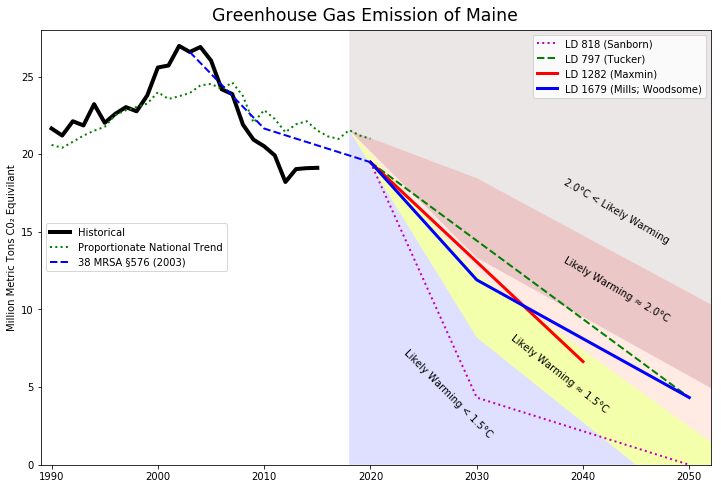

In [4]:
f4 = plt.figure(4, figsize=(12,8))
f4.suptitle('Greenhouse Gas Emission of Maine', size='xx-large', y=0.92)
p4 = f4.add_subplot(111, ylabel='Million Metric Tons C0₂ Equivilant')

for f in [regime125, regime150, regime175, regime200, regime225]:
    data = list(map(list, zip(*f['points'])))
    p4.fill(data[0],
            data[1],
            f['color'],
            closed = True)
    if 'hide' not in f:
        p4.text(f['x'], f['y'], f['name'], rotation=-f['r'])

history_plots = []
for data in [historical, national_trend, mrsa576]:
    p = p4.plot(data['data'].keys(),
            data['data'].values(),
            data['line'],
            linewidth=data['width'])
    p[0].set_label(data['name'])
    history_plots.append(p[0])
past_legend = p4.legend(handles = history_plots, loc = 6)

proposal_plots = []
for data in [ld818, ld797, ld1282, ld1679]:
    p = p4.plot(data['data'].keys(),
            data['data'].values(),
            data['line'],
            linewidth=data['width'])
    p[0].set_label(data['name'])
    proposal_plots.append(p[0])

p4.axis([1989, 2052, 0, 28])
p4.legend(handles=proposal_plots, loc=1)
p4.add_artist(past_legend)
plt.show()

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="If you are viewing this in Jupyter Notebooks, click here to toggle on/off the raw code."></form>''')